In [35]:
import os
from glob import glob
from dateutil import parser
from tqdm.notebook import tqdm
import zipfile

import cv2
import numpy as np
from moviepy.editor import ImageSequenceClip
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio
import rasterio.mask
from rasterio.plot import show
import folium

In [36]:
aoi_path = "../data/aoi/aoi.geojson"
df_aoi = gpd.read_file(aoi_path)
lon = df_aoi.geometry.iloc[0].centroid.x
lat = df_aoi.geometry.iloc[0].centroid.y

In [37]:
# map aoi
m = folium.Map([lat,lon], zoom_start=13)
folium.GeoJson(aoi_path).add_to(m)
m

In [19]:
# unzip downloaded files
downloaded_file_paths = glob("../data/sentinel-2/*.zip")
for downloaded_file_path in downloaded_file_paths:
    try:
        with zipfile.ZipFile(downloaded_file_path) as zf:
            zf.extractall(path = "../data/sentinel-2")
    except:
        print(f"{os.path.basename(downloaded_file_path)} is broken.")
        continue

S2B_MSIL1C_20190324T012659_N0207_R074_T54SUE_20190324T031422.zip is broken.
S2B_MSIL1C_20180217T012719_N0206_R074_T54SUE_20180328T091434.zip is broken.
S2A_MSIL1C_20200611T012701_N0209_R074_T54SUE_20200611T033049.zip is broken.
S2B_MSIL1C_20210221T012659_N0209_R074_T54SUE_20210221T030755.zip is broken.
S2A_MSIL1C_20190617T012701_N0207_R074_T54SUE_20190617T032421.zip is broken.
S2A_MSIL1C_20190806T012701_N0208_R074_T54SUE_20190806T032125.zip is broken.
S2B_MSIL1C_20180905T012649_N0206_R074_T54SUE_20180905T030536.zip is broken.
S2B_MSIL1C_20180329T012649_N0206_R074_T54SUE_20180329T041101.zip is broken.
S2B_MSIL1C_20180727T012649_N0206_R074_T54SUE_20180727T031235.zip is broken.
S2A_MSIL1C_20200202T012851_N0208_R074_T54SUE_20200202T032700.zip is broken.
S2A_MSIL1C_20190727T012701_N0208_R074_T54SUE_20190727T030353.zip is broken.


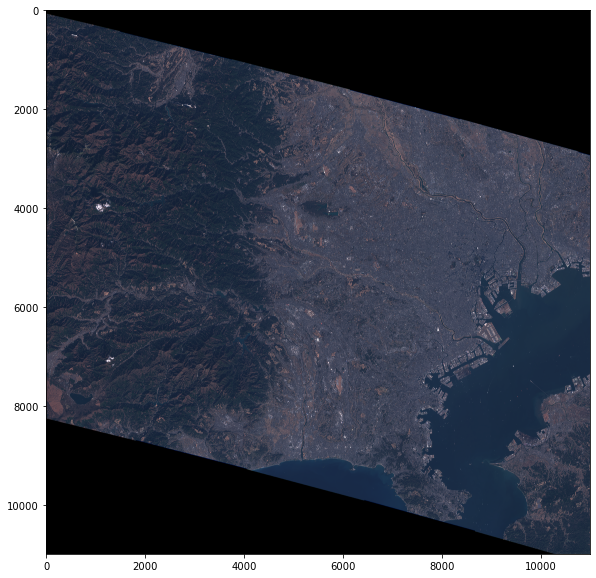

In [14]:
# show one scene
tci_paths = glob("../data/sentinel-2/**/*TCI.jp2", recursive=True)
tci_paths.sort()
tci_path = tci_paths[0]
with rasterio.open(tci_path) as src:
    fig, ax = plt.subplots(1, figsize=(10, 10))
    show(src.read(), ax=ax)
    plt.show()

In [33]:
imgs = []
for tci_path in tci_paths:
    with rasterio.open(tci_path) as src:
        img, transform = rasterio.mask.mask(src, df_aoi.to_crs(src.crs.to_epsg()).geometry, crop=True)
        img = img.transpose(1,2,0)
        img = img.astype(np.uint8)
        
    cv2.imwrite("./tmp.png",img)
    img = cv2.imread("./tmp.png")
    os.remove("./tmp.png")
    date = tci_path.split("/")[3].split("_")[2]
    date = parser.parse(date)
    date = date.strftime("%Y-%m-%d")

    cv2.putText(img, date, (400, 30),
               cv2.FONT_HERSHEY_PLAIN, 1,
               (255, 255, 255), 1, cv2.LINE_AA)
    cv2.putText(img, "produced from ESA remote sensing data", (230, 450),
               cv2.FONT_HERSHEY_PLAIN, 0.8,
               (255, 255, 255), 1, cv2.LINE_AA)    
        
    imgs.append(img)

In [34]:
clip = ImageSequenceClip(imgs, fps=6)
clip.write_gif("../data/timelapse.gif")

t:   6%|▌         | 2/33 [00:00<00:01, 17.36it/s, now=None]

MoviePy - Building file ../data/timelapse.gif with imageio.
